In [45]:
from scipy.sparse import vstack

from sklearn_evaluation import plot
from matplotlib import pyplot as plt

import numpy as np
from utils import *

np.random.seed(1122)

In [2]:
## Get data
data = get_IMBD_preprocessing(load_cached=True)
X_train, X_val, X_test, y_train, y_val, y_test = \
        data["X_train"], data["X_val"], data["X_test"], data["y_train"], data["y_val"], data["y_test"]

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
print (X_val.shape)
print (X_train.shape)
print (X_test.shape)

(6250, 92715)
(18750, 92715)
(25000, 92715)


In [5]:
##
# Grid search model selection
##

ESTIMATORS = [50,200,400]
CRITERION = ['gini','entropy']
MAX_DEPTH = [None, 2, 10]
parameters = {'n_estimators':ESTIMATORS, 'criterion':CRITERION, 'max_depth':MAX_DEPTH}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=3)
clf.fit(vstack((X_train,X_val)),np.concatenate((y_train,y_val)), )

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 200, 400], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

([<matplotlib.axis.XTick at 0x1228ffba8>,
 <a list of 3 Text xticklabel objects>)

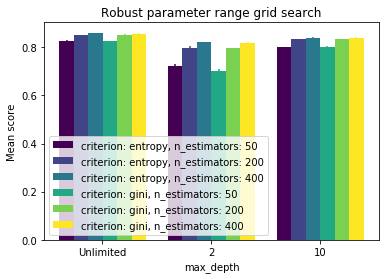

In [37]:
grid_search = plot.grid_search(clf.cv_results_, change='max_depth', kind='bar')
grid_search.legend(loc='lower left')
plt.title("Robust parameter range grid search")
plt.xticks([.33,1.33,2.33],["Unlimited", "2", "10"])

In [40]:
print ("Best model:",clf.best_params_)
cross_validation_best_esimator = clf.best_estimator_
print ("Test score:",cross_validation_best_esimator.score(X_test, y_test))

Best model: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 400}
Test score: 0.85744


In [14]:
##
# Underfit search model selection
##

ESTIMATORS = [5,10]
CRITERION = ['gini','entropy']
parameters = {'n_estimators':ESTIMATORS, 'criterion':CRITERION, 'max_depth':MAX_DEPTH}
clf_bad = GridSearchCV(RandomForestClassifier(), parameters, cv=3)
clf_bad.fit(vstack((X_train,X_val)),np.concatenate((y_train,y_val)))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print ("Best (bad) model:",clf_bad.best_params_)
cross_validation_best_esimator = clf_bad.best_estimator_
print ("Test score:",cross_validation_best_esimator.score(X_test, y_test))

Best (bad) model: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 10}
Test score: 0.74436


([<matplotlib.axis.XTick at 0x13c0e0908>,
 <a list of 3 Text xticklabel objects>)

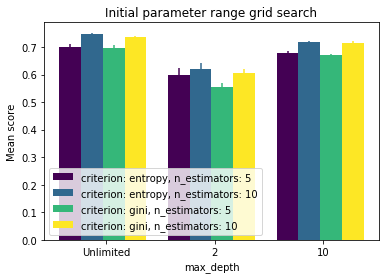

In [46]:
grid_search = plot.grid_search(clf_bad.cv_results_, change='max_depth', kind='bar')
grid_search.legend(loc='lower left')
plt.title("Initial parameter range grid search")
plt.xticks([.33,1.33,2.33],["Unlimited", "2", "10"])

In [47]:
preds = clf.predict(X_test)

In [48]:
print (y_test == preds)

[ True  True  True ...  True False False]


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, preds)

array([[10680,  1820],
       [ 1744, 10756]])